숫자 feature에 대한 pairplot + 상관관계 추정

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train_df = pd.read_parquet("../../data/HD_data/train.parquet").drop(columns="SAMPLE_ID")

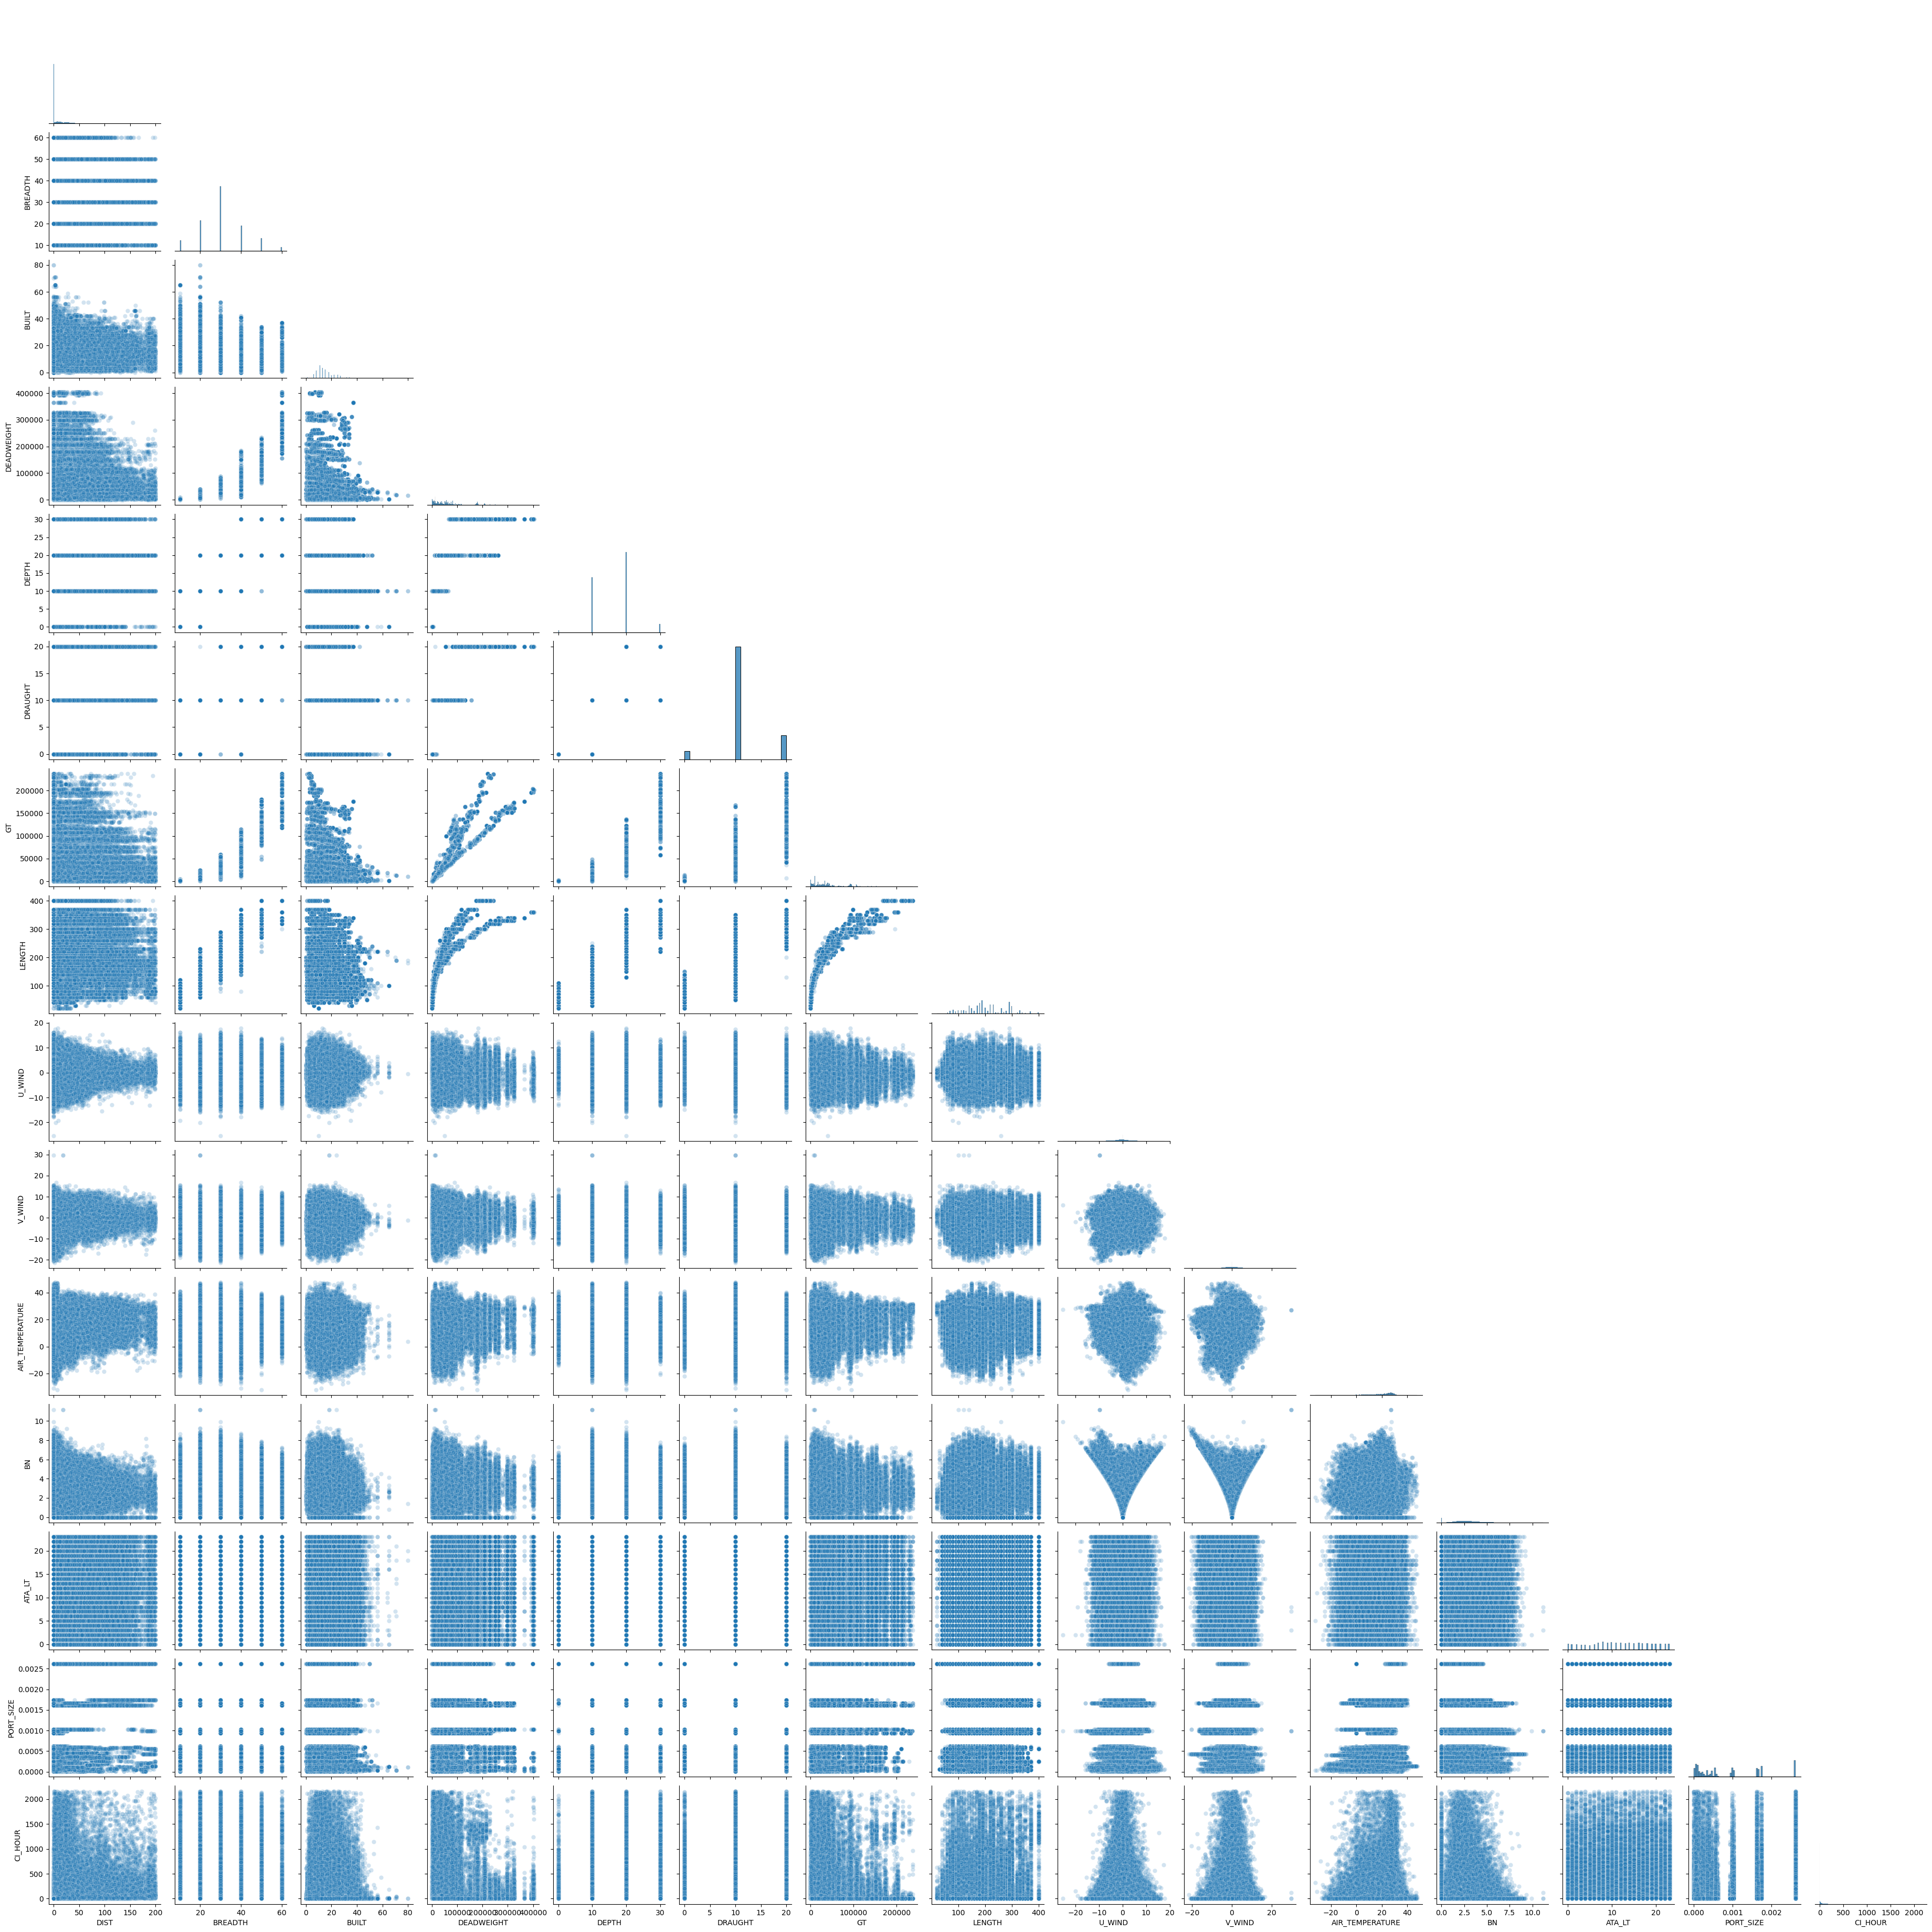

In [4]:
sns.pairplot(train_df, corner=True, plot_kws={"alpha": 0.2})
plt.show()

In [7]:
df = train_df[["BREADTH", "BUILT", "DEADWEIGHT", "DEPTH", "DRAUGHT", "GT", "LENGTH", "U_WIND", "V_WIND", "AIR_TEMPERATURE", "BN", "ATA_LT", "PORT_SIZE", "CI_HOUR"]]
df.corr()

BREADTH     BUILT  DEADWEIGHT     DEPTH   DRAUGHT        GT  \
BREADTH          1.000000 -0.209513    0.857126  0.790476  0.761323  0.903984   
BUILT           -0.209513  1.000000   -0.240297 -0.205493 -0.146958 -0.238181   
DEADWEIGHT       0.857126 -0.240297    1.000000  0.712969  0.813401  0.925143   
DEPTH            0.790476 -0.205493    0.712969  1.000000  0.581056  0.787595   
DRAUGHT          0.761323 -0.146958    0.813401  0.581056  1.000000  0.779028   
GT               0.903984 -0.238181    0.925143  0.787595  0.779028  1.000000   
LENGTH           0.920652 -0.180422    0.826766  0.842638  0.737606  0.916684   
U_WIND          -0.052329  0.011432   -0.028167 -0.041147 -0.035918 -0.039148   
V_WIND           0.022693 -0.007987    0.039253  0.030832  0.024974  0.023697   
AIR_TEMPERATURE  0.124799 -0.035759    0.084049  0.071866  0.089278  0.101976   
BN               0.086756 -0.011797    0.087114  0.072641  0.085895  0.072441   
ATA_LT           0.005974 -0.008881    0.007752  0.004835  0.005967  0.005578   
PORT_SIZE        0.036791  0.039486   -0.138979  0.019614 -0.043577  0.018301   
CI_HOUR          0.043711  0.001756    0.077954  0.051760  0.040309  0.059661   

                   LENGTH    U_WIND    V_WIND  AIR_TEMPERATURE        BN  \
BREADTH          0.920652 -0.052329  0.022693         0.124799  0.086756   
BUILT           -0.180422  0.011432 -0.007987        -0.035759 -0.011797   
DEADWEIGHT       0.826766 -0.028167  0.039253         0.084049  0.087114   
DEPTH            0.842638 -0.041147  0.030832         0.071866  0.072641   
DRAUGHT          0.737606 -0.035918  0.024974         0.089278  0.085895   
GT               0.916684 -0.039148  0.023697         0.101976  0.072441   
LENGTH           1.000000 -0.051747  0.023564         0.114536  0.079608   
U_WIND          -0.051747  1.000000  0.094894        -0.111792 -0.094966   
V_WIND           0.023564  0.094894  1.000000         0.186328 -0.182531   
AIR_TEMPERATURE  0.114536 -0.111792  0.186328         1.000000 -0.002831   
BN               0.079608 -0.094966 -0.182531        -0.002831  1.000000   
ATA_LT           0.005383 -0.011675  0.012978         0.028384  0.016894   
PORT_SIZE        0.085314 -0.069126  0.012399         0.219969 -0.102505   
CI_HOUR          0.035334 -0.012193  0.017415         0.035827 -0.016283   

                   ATA_LT  PORT_SIZE   CI_HOUR  
BREADTH          0.005974   0.036791  0.043711  
BUILT           -0.008881   0.039486  0.001756  
DEADWEIGHT       0.007752  -0.138979  0.077954  
DEPTH            0.004835   0.019614  0.051760  
DRAUGHT          0.005967  -0.043577  0.040309  
GT               0.005578   0.018301  0.059661  
LENGTH           0.005383   0.085314  0.035334  
U_WIND          -0.011675  -0.069126 -0.012193  
V_WIND           0.012978   0.012399  0.017415  
AIR_TEMPERATURE  0.028384   0.219969  0.035827  
BN               0.016894  -0.102505 -0.016283  
ATA_LT           1.000000  -0.002993  0.000090  
PORT_SIZE       -0.002993   1.000000  0.020635  
CI_HOUR          0.000090   0.020635  1.000000

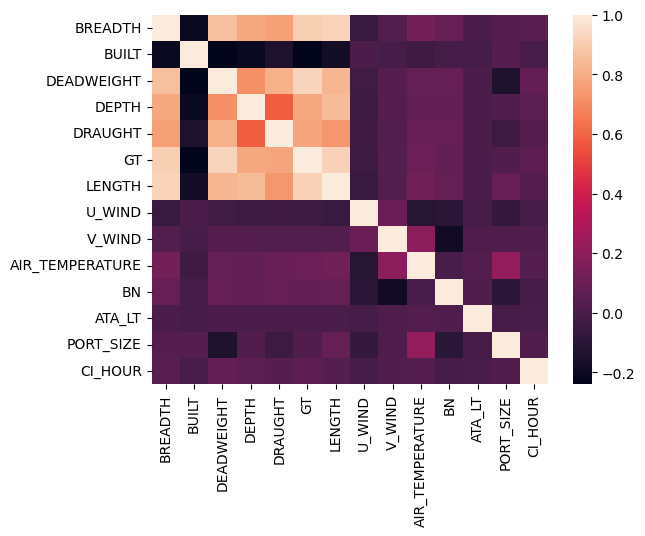

In [8]:
sns.heatmap(df.corr())
plt.show()

In [10]:
# drop : "U_WIND", "V_WIND", "AIR_TEMPERATURE"
df = train_df[["BREADTH", "BUILT", "DEADWEIGHT", "DEPTH", "DRAUGHT", "GT", "LENGTH", "BN", "ATA_LT", "PORT_SIZE", "CI_HOUR"]]
df.fillna(df.mean(), inplace=True)
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["Features"] = df.columns
vif

VIF_Factor    Features
0    67.225478     BREADTH
1     5.297079       BUILT
2    20.868139  DEADWEIGHT
3    29.123624       DEPTH
4    20.436976     DRAUGHT
5    25.706154          GT
6    94.083292      LENGTH
7     6.752409          BN
8     3.887847      ATA_LT
9     2.594876   PORT_SIZE
10    1.143729     CI_HOUR